# Logistic Regression


We are given a dataset, such as the one below:

| Class| Feature1 | Feature2  |
|---| |---|
| 0 |5.7| 3.1|
| 1|-0.3|2 |
|---| |---|
|  $y_i$| $x_{i,1}$ | $x_{i,2}$ |
|---| |---|
| 1|0.4|5 |

The goal is learning to predict the labels of a future dataset, where we are given its features:

| Class| Feature1 | Feature2  |
|---| |---|
| ? |4.8| 3.2|
| ? |-0.7|2.4 |
|---| |---|

More formally, the dataset consists of $N$ feature vectors $x_i$ and the associated labels $y_i$ for each example $i=1\dots N$. The labels $y$ are referred also as the class label -- but in reality labels could be any answer to a true-false question, such as 'is object $i$ a flower?' or 'will customer $i$ by this product in the next month?'. We can arrange the features in a matrix $X$ and the labels in a vector $y$:

\begin{eqnarray}
X & = &  \begin{pmatrix}
  x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
  x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{i,1} & x_{i,2} & \dots & x_{i,D}  \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{pmatrix} = 
\begin{pmatrix}
x_1^\top \\
x_2^\top \\
\dots \\
x_i^\top \\
\dots \\
x_N^\top
\end{pmatrix} 
\\
{y} & = & \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{pmatrix}
\end{eqnarray}
where $x_{i,j}$ denotes the $j$'th feature of the $i$'th data point. It is customary, to set a column entirely to $1$'s, for example we take $x_{i,D}=1$ for all $i$. This 'feature' is artificially added to the dataset to allow a slightly more flexible model. 

Logistic Regression is a method that can be used to solve this binary classification problem. 
In logistic regression, we consider the case of binary classification where $y_i \in \{0,1\}$. It is possible to use other encodings such as $y_i \in \{-1,1\}$; the derivations are similar.

The key idea is learning a mapping from a feature vector $x$ to a probability, a number between $0$ and $1$. 

The model is 
$$
\Pr\{y_i = 1\} = \sigma(x_i^\top w)
$$
Here,
$\sigma(x)$ is the sigmoid function defined as
\begin{eqnarray}
\sigma(x) & = & \frac{1}{1+e^{-x}}
\end{eqnarray}

This is a generative model. To understand logistic regression as a generative model, consider the following metaphor: assume that for each data instance $x_i$, we select a biased coin with probability $p(y_i = 1| w, x^\top_i) = \pi_i = \sigma(x_i^\top w)$, throw the coin and label the data item with class $y_i$ accordingly. 

Mathematically, we assume that each label $y_i$, or more precisely the answer to our yes-no question rearding the object $i$ with feature vector $w$ is drawn from a Bernoulli distribution. That is: 
\begin{eqnarray}
\pi_i & = & \sigma(x_i^\top w) \\
y_i & \sim &\mathcal{BE}(\pi)
\end{eqnarray}

Here, we think of a biased coin with two sides denoted as $H$ (head) and $T$ (tail) with probability of side $H$ as $\pi$, and consequently the probability of side $T$ with $1-\pi$. 

We denote the outcome of the coin toss with the random variable $y \in \{0, 1\}$. 

For each throw $i$, $y_i$ is the answer to the question 'Is the outcome heads?'. We write the probability as $p(y = 1) = \pi$ and probability of tails is $p(y = 0) = 1-\pi$. More compactly, the probability of the outcome of a toss, provided we know $\pi$, is written as
\begin{eqnarray}
p(y|\pi) = \pi^y(1-\pi)^y
\end{eqnarray}

### Maximum Likelihood

Maximum likelihood (ML) is a method for choosing the unknown parameters of a probability distribution, given some data that is assumed to be drawn from this distribution. The distribution itself is referred as the probability model, or often just the model.

#### Example
Suppose we are given only $5$ outcomes when a coin is thrown:
$$
H, T, H, T, T
$$

What is the probabilty that the outcome is, say heads $H$ if we know that the coin is biased ?.

One reasonable answer may be the frequency of heads, $2/5$.

The ML solution coincides with this answer. For a derivation, 
we define $y_i$ for $i = 1,2,\dots, 5$ as

$$
y_i  = \left\{ \begin{array}{cc} 1 & \text{coin $i$ is H} \\ 0 & \text{coin $i$ is T}  \end{array} \right. 
$$
hence 
$$
y = [1,0,1,0,0]^\top
$$

If we assume that the outcomes were independent, the probability of observing the above sequence as a function of the parameter $\pi$ is the product of each individual probability
$$
\Pr\{y = [1,0,1,0,0]^\top\} = \pi \cdot (1-\pi) \cdot \pi \cdot (1-\pi) \cdot(1-\pi) 
$$

We could try finding the $\pi$ value that maximizes this function. We will call the corresponding value as the maximum likelhood solution, and denote it as $\pi^*$. 

It is often more convenient to work with the logarithm of this function, known as the loglikelihood function.

$$
\mathcal{L}(\pi) = 2 \log \pi + 3 \log (1-\pi)
$$
For finding the maximum, we take the derivative with respect to $\pi$ and set to zero.
$$
\frac{d \mathcal{L}(\pi)}{d \pi} = \frac{2}{\pi^*} -  \frac{3}{1-\pi^*} = 0 
$$
When we solve we obtain $$ \pi^* = \frac{2}{5} $$

More generally, when we observe $y_i$ for $i=1 \dots N$, the loglikelihood is

\begin{eqnarray}
\mathcal{L}(\pi)& = & \log \left(\prod_{i : y_i=1} \pi \right) \left(\prod_{i : y_i=0}(1- \pi) \right) \\
& = & \log \prod_{i = 1}^N \pi^{y_i} (1- \pi)^{1-y_i} \\
& = & \log  \pi^{ \sum_i y_i} (1- \pi)^{\sum_i (1-y_i) } \\
& = & \left(\sum_i y_i\right) \log \pi + \left(\sum_i (1-y_i) \right) \log (1- \pi) 
\end{eqnarray}

If we define the number of observed $0$'s and $1$'s by $c_0$ and $c_1$ respectively, we have 

\begin{eqnarray}
\mathcal{L}(\pi)& = & c_1 \log \pi + c_0 \log (1- \pi) 
\end{eqnarray}

Taking the derivative and setting to $0$ results in

$$
\pi^* = \frac{c_1}{c_0+c_1} = \frac{c_1}{N} 
$$



### Logistic Regression: Learning the parameters

The logistic regression model is very similar to the coin model. The main difference is that we use a specific coin with a probability $\sigma(x_i^\top w)$ that depends on the specific feature vector and the global parameter vector $w$.  
The likelihood of the observations, that is the probability of observing the class sequence is
\begin{eqnarray}
p(y_1, y_2, \dots, y_N|w, X ) &=& \left(\prod_{i : y_i=1} \sigma(x_i^\top w) \right) \left(\prod_{i : y_i=0}(1- \sigma(x_i^\top w)) \right)
\end{eqnarray}
Here, the left product is the expression for examples from class $1$ and the right product is for examples from class $0$.
We will look for the particular setting of the weight vector, the maximum likelihood solution, denoted by $w^*$.
\begin{eqnarray}
w^* & = & \arg\max_{w} {\cal L}(w)
\end{eqnarray}
where the loglikelihood function
\begin{eqnarray}
{\cal L}(w) & = & \log p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) \\
& = & \sum_{i : y_i=1} \log \sigma(x_i^\top w) + \sum_{i : y_i=0} \log (1- \sigma(x_i^\top w)) \\
& = & \sum_{i : y_i=1} x_i^\top w - \sum_{i : y_i=1} \log(1+e^{x_i^\top w}) - \sum_{i : y_i=0}\log({1+e^{x_i^\top w}}) \\
& = & \sum_i y_i x_i^\top w - \sum_{i} \log(1+e^{x_i^\top w}) \\
& = & y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
\end{eqnarray}

$\mathbf{1}$ is a vector of ones; note that when we premultiply a vector $v$ by $\mathbf{1}^T$ we get the sum of the entries of $v$, i.e. $\mathbf{1}^T v = \sum_i v_i$.

We define the function $\text{logsumexp}(a, b)$ as follows: When $a$ and $b$ are scalars, 
$$
f = \text{logsumexp}(a, b) \equiv \log(e^a + e^b)
$$

When $a$ and $b$ are vectors of the same size, $f$ is the same size as $a$ and $b$ where each entry of $f$ is
$$
f_i = \text{logsumexp}(a_i, b_i) \equiv \log(e^{a_i} + e^{b_i})
$$

Unlike the least-squares problem, an expression for direct evaluation of $w^*$ is not known so we need to resort to numerical optimization. 

Before we proceed, it is informative to look at the shape of $f(x) = \text{logsumexp}(0, x)$.
When $x$ is negative and far smaller than zero, $f = 0$ and for large values of $x$, $f(x) = x$. Hence it looks like a so-called hinge function $h$
$$
h(x) = \left\{ \begin{array}{cc} 0 & x < 0 \\x & x \geq 0  \end{array} \right.
$$

We define
$$
f_\alpha(x) = \frac{1}{\alpha}\text{logsumexp}(0, \alpha x)
$$
When $\alpha = 1$, we have the original logsumexp function. For larger $\alpha$, it becomes closer to the hinge loss.

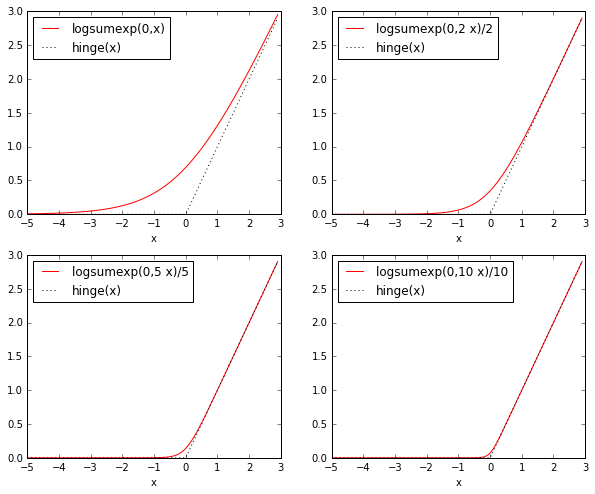

In [35]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

def logsumexp(a,b):
    m = np.max([a,b])
    return m + np.log(np.exp(a-m) + np.exp(b-m))

def hinge(x):
    return x if x>0 else 0

xx = np.arange(-5,3,0.1)

plt.figure(figsize=(10,8))
for i,alpha in enumerate([1,2,5,10]):
    f = [logsumexp(0, alpha*z)/alpha for z in xx]
    h = [hinge(z) for z in xx]
    
    plt.subplot(2,2,i+1)
    plt.plot(xx, f, 'r')
    plt.plot(xx, h, 'k:')
    plt.xlabel('x')
    #plt.title('a = '+ str(alpha))
    if alpha==1:
        plt.legend([ 'logsumexp(0,x)','hinge(x)' ], loc=2 )    
    else:
        plt.legend([ 'logsumexp(0,{a} x)/{a}'.format(a=alpha),'hinge(x)' ], loc=2 )

    
    
plt.show()

The resemblance of the logsumexp function to an hinge function provides a nice interpretation of the log likelihood. Consider the negative log likelihood written in terms of the contributions of each single item:

$$
- \mathcal{L}(\pi) = - \sum_i l_i(w)
$$
$$
-l_i(w) = - y_i x_i^\top w + \text{logsumexp}(0, x_i^\top w) 
$$

This function provides the 'error' made on a single item. Suppose, $y_i = 1$ and $z_i = x_i^\top w$. When $z \gg 0$, the item $i$ will be classified correctly and won't contribute to the total error. However, when $z \ll 0$, the item will have a very low probability for being classified correctly.    

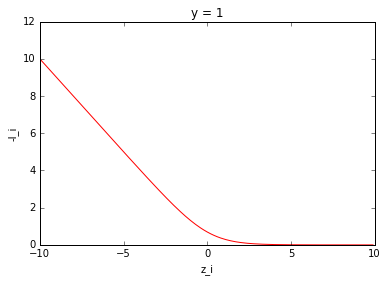

In [46]:
xx = np.arange(-10,10,0.1)
y = 1
f = [-y*z + logsumexp(0, z) for z in xx]

plt.plot(xx, f, 'r')
plt.xlabel('z_i')
plt.ylabel('-l_i')
plt.title('y = '+str(y))
plt.show()



### Properties of the logsumexp function

If 
$$
f(z) = \text{logsumexp}(0, z) = \log(1 + \exp(z))
$$
The derivative is
$$
\frac{df(z)}{dz} = \frac{\exp(z)}{1 + \exp(z)} = \sigma(z)
$$

When $z$ is a vector, $f(z)$ is a vector. The derivative of
$$
\sum_i f(z_i) = \mathbf{1}^\top f(z)
$$

$$
\frac{d \mathbf{1}^\top f(z)}{dz} = \left(\begin{array}{c} \sigma(z_1) \\ \vdots \\ \sigma(z_N) \end{array} \right) \equiv \sigma(z)
$$
where the sigmoid function $\sigma$ is applied elementwise to $z$.

### Properties of the sigmoid function
Note that

\begin{eqnarray}
\sigma(x) & = & \frac{e^x}{(1+e^{-x})e^x} = \frac{e^x}{1+e^{x}} \\
1 - \sigma(x) & = & 1 - \frac{e^x}{1+e^{x}} = \frac{1+e^{x} - e^x}{1+e^{x}} = \frac{1}{1+e^{x}}
\end{eqnarray}

\begin{eqnarray}
\sigma'(x) & = & \frac{e^x(1+e^{x}) - e^{x} e^x}{(1+e^{x})^2} = \frac{e^x}{1+e^{x}}\frac{1}{1+e^{x}} = \sigma(x) (1-\sigma(x))
\end{eqnarray}

\begin{eqnarray}
\log \sigma(x) & = & -\log(1+e^{-x}) = x - \log(1+e^{x}) \\
\log(1 - \sigma(x)) & = &  -\log({1+e^{x}})
\end{eqnarray}




Exercise: Plot the sigmoid function and its derivative.

### Optimization via gradient ascent

One way for
optimization is gradient ascent
\begin{eqnarray}
w^{(\tau)} & \leftarrow & w^{(\tau-1)} + \eta \nabla_w {\cal L}
\end{eqnarray}
where
\begin{eqnarray}
\nabla_w {\cal L} & = &
\begin{pmatrix}
{\partial {\cal L}}/{\partial w_1} \\
{\partial {\cal L}}/{\partial w_2} \\
\vdots \\
{\partial {\cal L}}/{\partial w_{D}}
\end{pmatrix}
\end{eqnarray}
is the gradient vector and $\eta$ is a learning rate.

#### Evaluating the gradient (Short Derivation)

$$
\mathcal{L}(w) = y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
$$

$$
\frac{d\mathcal{L}(w)}{dw} = X^\top y - X^\top \sigma(X w) = X^\top (y -\sigma(X w))
$$

#### Evaluating the gradient (Long Derivation)
The partial derivative of the loglikelihood with respect to the $k$'th entry of the weight vector is given by the chain rule as
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \frac{\partial{\cal L}}{\partial \sigma(u)} \frac{\partial \sigma(u)}{\partial u} \frac{\partial u}{\partial w_k}
\end{eqnarray}

\begin{eqnarray}
{\cal L}(w) & = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial{\cal L}(\sigma)}{\partial \sigma} & = &  \sum_{i : y_i=1} \frac{1}{\sigma(w^\top x_i)} - \sum_{i : y_i=0} \frac{1}{1- \sigma(w^\top x_i)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \sigma(u)}{\partial u} & = & \sigma(w^\top x_i) (1-\sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial w^\top x_i }{\partial w_k} & = & x_{i,k}
\end{eqnarray}


So the gradient is
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{\sigma(w^\top x_i)} x_{i,k} - \sum_{i : y_i=0} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{1- \sigma(w^\top x_i)} x_{i,k} \\
& = & \sum_{i : y_i=1} {(1-\sigma(w^\top x_i))} x_{i,k} - \sum_{i : y_i=0} {\sigma(w^\top x_i)} x_{i,k}
\end{eqnarray}

We can write this expression more compactly by noting
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} {(\underbrace{1}_{y_i}-\sigma(w^\top x_i))} x_{i,k} + \sum_{i : y_i=0} {(\underbrace{0}_{y_i} - \sigma(w^\top x_i))} x_{i,k} \\
& = & \sum_i (y_i - \sigma(w^\top x_i)) x_{i,k}
\end{eqnarray}

$\newcommand{\diag}{\text{diag}}$

The Hessian is 
\begin{eqnarray}
\frac{\partial^2{\cal L}}{\partial w_k \partial w_r} & = & - \sum_i (1-\sigma(w^\top x_i)) \sigma(w^\top x_i) x_{i,k} x_{i,r} \\
\pi & \equiv & \sigma(X w) \\
\nabla \nabla^\top \mathcal{L}& = & -X^\top \diag(\pi(1 - \pi)) X 
\end{eqnarray}


The update rule is
\begin{eqnarray}
w^{(\tau)} = w^{(\tau-1)} + \eta X^\top (y-\sigma(X w))
\end{eqnarray}




In [1]:
%matplotlib inline
from cvxpy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

/Users/cemgil/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[0 1]
[2 3 4]


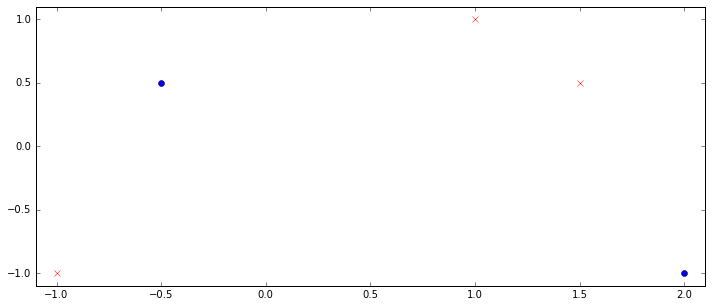

In [215]:
#x = np.matrix('[-2,1; -1,2; 1,5; -1,1; -3,-2; 1,1] ')
x = np.matrix('[-0.5,0.5;2,-1;-1,-1;1,1;1.5,0.5]')
#y = np.matrix('[0,0,1,0,0,1]').T
y = np.matrix('[0,0,1,1,1]').T
N = x.shape[0]
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
#X = np.hstack((x, np.ones((N,1)) ))
X = x

def sigmoid(x):
    return 1/(1+np.exp(-x))


idx = np.nonzero(y)[0]
idxc = np.nonzero(1-y)[0]

fig = plt.figure(figsize=(12,5))
plt.plot(x[idx,0], x[idx,1], 'rx')
plt.plot(x[idxc,0], x[idxc,1], 'bo')
fig.gca().set_xlim([-1.1,2.1])
fig.gca().set_ylim([-1.1,1.1])
print(idxc)
print(idx)

plt.show()

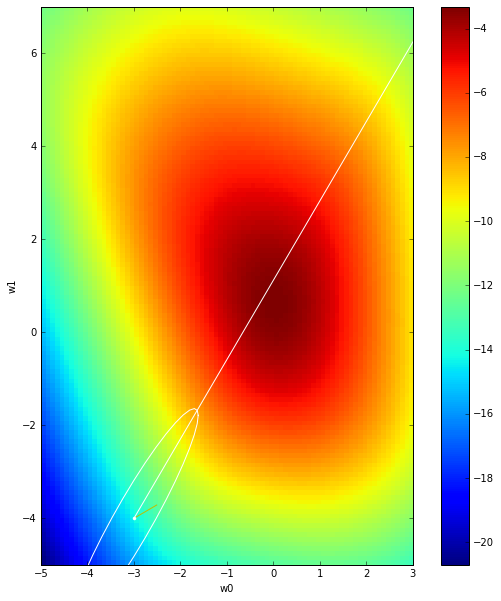

In [225]:
from itertools import product

def ellipse_line(A, mu, col='b'):
    '''
    Creates an ellipse from short line segments y = A x + \mu 
    where x is on the unit circle.
    '''
    N = 18
    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
    X = np.mat(np.vstack((np.cos(th),np.sin(th))))
    
    Y = A*X
    ln = plt.Line2D(mu[0]+Y[0,:],mu[1]+Y[1,:],markeredgecolor='w', linewidth=1, color=col)
    return ln


left = -5
right = 3
bottom = -5
top = 7
step = 0.1
W0 = np.arange(left,right, step)
W1 = np.arange(bottom,top, step)

LLSurf = np.zeros((len(W1),len(W0)))

# y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
vmax = -np.inf
vmin = np.inf
for i,j in product(range(len(W1)), range(len(W0))):
    w = np.matrix([W0[j], W1[i]]).T
    p = X*w
    ll = y.T*p - np.sum(np.log(1+np.exp(p)))
    
    vmax = np.max((vmax, ll))
    vmin = np.min((vmin, ll))
    
    LLSurf[i,j] = ll

fig = plt.figure(figsize=(10,10))
plt.imshow(LLSurf, interpolation='nearest', 
           vmin=vmin, vmax=vmax,origin='lower',
           extent=(left,right,bottom,top))
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()


W0 = np.arange(left+2,right-5, 12*step)
W1 = np.arange(bottom+1,top-10, 12*step)

for i,j in product(range(len(W1)), range(len(W0))):
    w = np.matrix([W0[j], W1[i]]).T
    #w = np.mat([-1,1]).T

    p = sigmoid(X*w)
    dw = 0.2*X.T*(y-p)
    #print(p)
    S = np.mat(np.diag(np.asarray(np.multiply(p,1-p)).flatten()))
    H = X.T*S*X
    dw_nwt = 0.08*H.I*X.T*(y-p)

    C = np.linalg.cholesky(H.I)
#    plt.hold(True)
    ln = ellipse_line(C/3., w, 'w')
    ax = fig.gca()
    ax.add_line(ln)
    ln2 = plt.Line2D((float(w[0]), float(w[0]+dw[0])), (float(w[1]), float(w[1]+dw[1])),color='y')
    ax.add_line(ln2)
    ln3 = plt.Line2D((float(w[0]), float(w[0]+dw_nwt[0])), (float(w[1]), float(w[1]+dw_nwt[1])),color='w')
    ax.add_line(ln3)
    plt.plot(w[0,0],w[1,0],'.w')

    
    
    #print(C)
    #print(S)

ax.set_xlim((left,right))
ax.set_ylim((bottom,top))
plt.show()

In [153]:
w = np.mat([1,-1]).T
w

p = sigmoid(X*w)
S = np.mat(np.diag(np.asarray(np.multiply(p,1-p)).flatten()))

X.T*S*X

matrix([[ 1.51630736,  0.75371756],
        [ 0.75371756,  0.79094158]])

In [188]:

float(w[0])


3.1999999999999984

In [114]:
print(y)
print(X)

#w = np.random.randn(3,1)

w = np.mat('[1;2]')

print(w)

print(sigmoid(X*w))
eta = 0.1

for i in range(10000):
    pr = sigmoid(X*w)
    w = w + eta*X.T*(y-pr)
    
print(np.hstack((y,pr)))
print(w)

[[0]
 [0]
 [1]
 [1]
 [1]]
[[-0.5  0.5]
 [ 2.  -1. ]
 [-1.  -1. ]
 [ 1.   1. ]
 [ 2.   1. ]]
[[1]
 [2]]
[[ 0.62245933]
 [ 0.5       ]
 [ 0.04742587]
 [ 0.95257413]
 [ 0.98201379]]
[[ 0.          0.59561717]
 [ 0.          0.30966921]
 [ 1.          0.32737446]
 [ 1.          0.67262554]
 [ 1.          0.66660954]]
[[-0.02719403]
 [ 0.74727817]]


In [3]:
N = 1000
K = 10
Ke = 40-K

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.matrix(np.random.randn(N, K))
w_true = np.random.randn(K,1)

p = sigmoid(x*w_true)
u = np.random.rand(N,1)
y = (u < p)
y = y.astype(np.float64)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
X = np.hstack((x, np.random.randn(N, Ke )))




[[ -4.61873692e-01]
 [ -3.45888873e-11]
 [ -1.15100442e+00]
 [  2.96918652e-01]
 [  6.06625465e-01]
 [  6.42161156e-01]
 [ -5.66000985e-01]
 [ -1.22920576e-10]
 [ -7.62241790e-01]
 [  2.26527800e-10]
 [  5.59296917e-11]
 [ -1.06575891e-10]
 [ -3.80442713e-11]
 [  7.35221115e-10]
 [  9.11113530e-13]
 [  7.95399232e-13]
 [  3.46032187e-11]
 [ -5.92069678e-13]
 [ -3.68158703e-11]
 [ -1.28123391e-11]
 [ -1.18309432e-11]
 [ -5.20654701e-12]
 [ -6.03313857e-11]
 [ -5.89164342e-12]
 [ -3.35170186e-10]
 [  2.63155232e-11]
 [ -1.37202788e-11]
 [  3.38273484e-11]
 [  2.84843711e-11]
 [ -2.88087419e-11]
 [ -2.03696923e-11]
 [ -1.55134247e-11]
 [  7.06091201e-12]
 [  3.72090301e-11]
 [ -3.33548890e-12]
 [  6.84441048e-12]
 [ -5.19792493e-10]
 [ -2.36637916e-11]
 [ -6.33682911e-12]
 [  7.44414549e-04]]


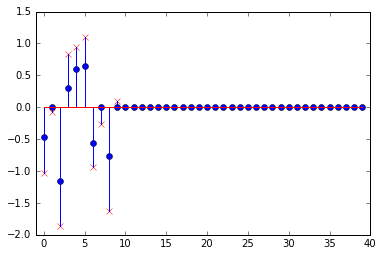

In [4]:
z = np.zeros((N,1))
# Construct the problem.
w = Variable(K+Ke)
objective = Minimize(25.5*norm(w, 1) -y.T*X*w + sum_entries(log_sum_exp(hstack(z, X*w),axis=1)))
#constraints = [0 <= x, x <= 10]
#prob = Problem(objective, constraints)
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print(w.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
#print(constraints[0].dual_value)

#plt.show()

plt.stem(w.value)
plt.stem(w_true,markerfmt='xr')

plt.gca().set_xlim((-1, K+Ke))
plt.show()



In [5]:
%connect_info

{
  "stdin_port": 52252, 
  "ip": "127.0.0.1", 
  "control_port": 52253, 
  "hb_port": 52254, 
  "signature_scheme": "hmac-sha256", 
  "key": "ea79abbc-0894-4390-90e4-df49b34619e0", 
  "shell_port": 52250, 
  "transport": "tcp", 
  "iopub_port": 52251
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-0e1f423d-e753-4e58-a8b9-87b5530794df.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [152]:

np.mat(np.diag(np.asarray(w).flatten()))

matrix([[ 1,  0],
        [ 0, -1]])

In [86]:
np.nonzero(idx)
#x[idx][:,:]

(array([2, 3, 4]), array([0, 0, 0]))